# Convolutional Neural Network and Why We Choose This For Image Classification Than Neural Network

In this first section, we will importing MNIST Data. Then we will run 3 different model.

1.   Neural Network
2.   Neural Network with Regularizer
3.   Convolutional Neural Network

All model only use 10 epochs. The target accuracy of training data is above 95%. If the accuracy of the training data is below that. We will add more neuron or layer. If above 95% we will use that model. Note that in this notebook the layer and neuron between each model is different. But i will use visualization that we can get insight and whats happening with our model.





In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [5]:
from keras.datasets import mnist

In [86]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [87]:
X_train, X_test = X_train / 255, X_test / 255

We will show our first image in training data.

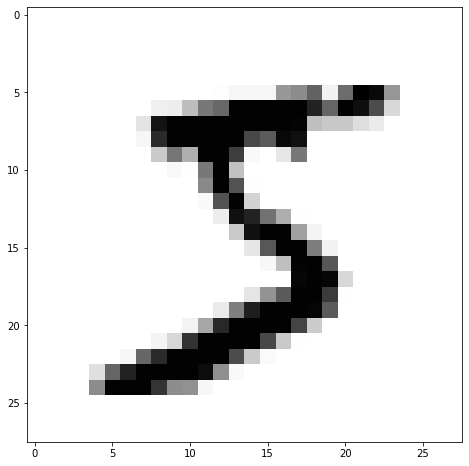

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(X_train[0], cmap='Greys');

In [66]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Neural Network
Model_1 will be neural network without regulizer. I print the summary of the model below and you can see the detail.

In [93]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [95]:
model_nn.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_nn.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 512)               401920    
                                                                 
 dense_51 (Dense)            (None, 128)               65664     
                                                                 
 dense_52 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [96]:
history_nn = model.fit(X_train, y_train, 
                    epochs = 10, 
                    batch_size = 256,
                    validation_data = (X_test, y_test))

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2882 - accuracy: 0.9139 - val_loss: 0.1421 - val_accuracy: 0.9567
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1029 - accuracy: 0.9683 - val_loss: 0.1159 - val_accuracy: 0.9628
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0765 - val_accuracy: 0.9745
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.0709 - val_accuracy: 0.9782
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0322 - accuracy: 0.9895 - val_loss: 0.0739 - val_accuracy: 0.9788
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.0847 - val_accuracy: 0.9767
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0849 - val_accuracy: 0.9776
Epoch 

## Neural Network With Regularizer
Model_2 will be neural network with regulizer. Each layer will have another droput layer with 0.5 value. Then each dense will have kernel regularizer

In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [89]:
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)             

In [90]:
history = model.fit(X_train, y_train, 
                    epochs = 10, 
                    batch_size = 256,
                    validation_data = (X_test, y_test))

Epoch 1/10
235/235 [==============================] - 17s 5ms/step - loss: 0.8234 - accuracy: 0.8196 - val_loss: 0.4030 - val_accuracy: 0.9456
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.4529 - accuracy: 0.9319 - val_loss: 0.3317 - val_accuracy: 0.9617
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3761 - accuracy: 0.9484 - val_loss: 0.2906 - val_accuracy: 0.9681
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.9544 - val_loss: 0.2669 - val_accuracy: 0.9704
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3088 - accuracy: 0.9575 - val_loss: 0.2344 - val_accuracy: 0.9764
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2882 - accuracy: 0.9609 - val_loss: 0.2281 - val_accuracy: 0.9767
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2734 - accuracy: 0.9629 - val_loss: 0.2164 - val_accuracy: 0.9771
Epoch

## Convolutional Neural Network
The model number 3 will be convolutional neural network and no regularizer in the Dense layer.

In [69]:
cnn_model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [102]:
cnn_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_14 (Flatten)        (None, 576)             

In [74]:
history_cnn = cnn_model.fit(X_train, y_train, 
                epochs=10,
                batch_size=128,
                validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0262 - val_accuracy: 0.9926
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0416 - val_accuracy: 0.9896
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0352 - val_accuracy: 0.9911
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0356 - val_accuracy: 0.9906
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0358 - val_accuracy: 0.9914
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0390 - val_accuracy: 0.9904
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0383 - val_accuracy: 0.9909
Epoch 

## Comparison and explaination

In [78]:
def visualize(model, value = 'loss'):
  value2 = "val_" + str(value)
  plt.xlabel('Epochs')
  plt.ylabel(value)
  plt.plot(model.history[value], label='training', c='red')
  plt.plot(model.history[value2], label='validation', c='blue')
  plt.legend()
  return

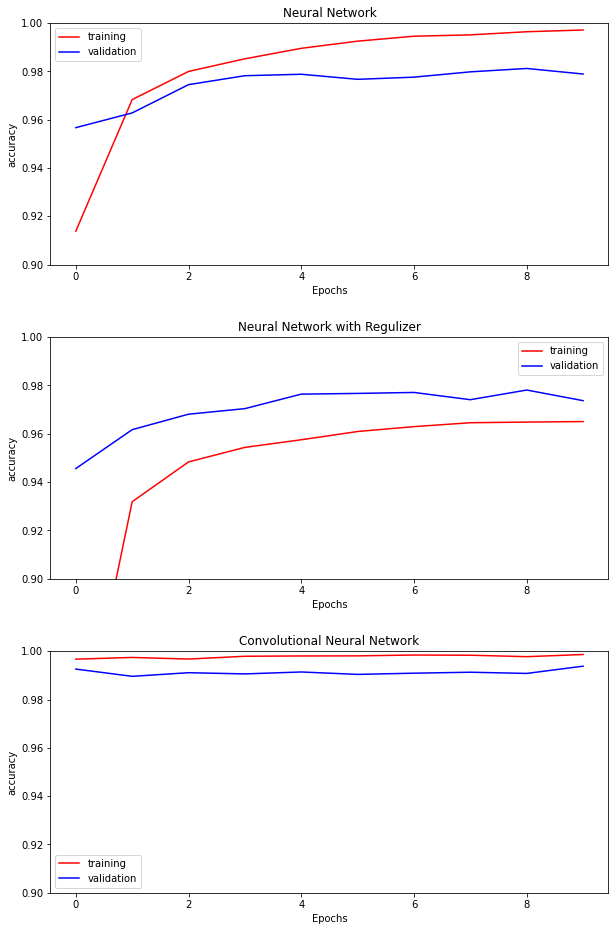

In [104]:
fig = plt.figure(figsize=(10,16))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plt.subplot(3, 1, 1)
visualize(history_nn, 'accuracy')
plt.title('Neural Network')
plt.ylim([0.9, 1])

plt.subplot(3, 1, 2)
visualize(history, 'accuracy')
plt.title('Neural Network with Regulizer')
plt.ylim([0.9, 1])

plt.subplot(3, 1, 3)
visualize(history_cnn, 'accuracy')
plt.title('Convolutional Neural Network')
plt.ylim([0.9, 1])

plt.show()

Here some insight from the image above:
1.   The training and validation accuracy of the neural network withour regularizer is higher than model with regularizer.
2.   But in neural network without regularizer you cann see that the gap between training and validation is increasing at epoch number 2. This means the model start to overfit to the training data.
3. In neural network with regularizer the gap is getting smaller in each epoch so the model is generalize enough to prevent overfit. But the accuracy we got  from this model is lower than the model_1.
4. With Convolutional Neural Network. We got the highest accuracy than the other method even without regularizer in the Dense layer. Thats why we use CNN model for image classification. For more detailed information you can find it in google.

